# Estadística Aplicada
## Raúl Flores Robles 1838148
### Sesión 9- 3 de marzo 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lifelines import KaplanMeierFitter

In [3]:
dic_t = {'tiempo':[12,19,20,20,33],'evento':[1,1,1,0,0]}
dic_nt = {'tiempo':[3,5,7,9,18],'evento':[1,1,1,0,1]}

In [4]:
#Convertir en df los diccionarios 
tratamiento = pd.DataFrame(dic_t)
no_trat= pd.DataFrame(dic_nt)

In [5]:
tratamiento

,tiempo,evento
0,12,1
1,19,1
2,20,1
3,20,0
4,33,0


In [6]:
no_trat

,tiempo,evento
0,3,1
1,5,1
2,7,1
3,9,0
4,18,1


In [7]:
km_t = KaplanMeierFitter().fit(tratamiento['tiempo'],tratamiento['evento'])
km_nt = KaplanMeierFitter().fit(no_trat['tiempo'],no_trat['evento'])

In [8]:
km_t.survival_function_

,KM_estimate
timeline,
0.0,1.0
12.0,0.8
19.0,0.6
20.0,0.4
33.0,0.4


In [9]:
km_nt.survival_function_

,KM_estimate
timeline,
0.0,1.0
3.0,0.8
5.0,0.6
7.0,0.4
9.0,0.4
18.0,0.0


In [10]:
km_t.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,5,5
12.0,1,1,0,0,5
19.0,1,1,0,0,4
20.0,2,1,1,0,3
33.0,1,0,1,0,1


In [11]:
km_nt.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,5,5
3.0,1,1,0,0,5
5.0,1,1,0,0,4
7.0,1,1,0,0,3
9.0,1,0,1,0,2
18.0,1,1,0,0,1


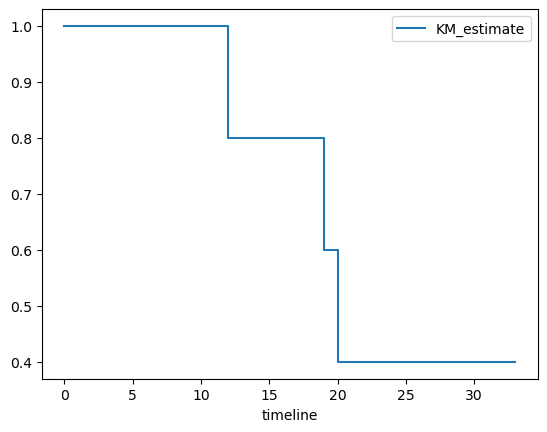

In [13]:
km_t.plot_survival_function(ci_show=False);

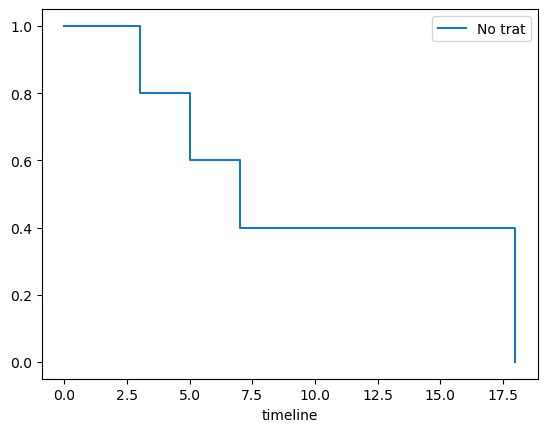

In [14]:
km_nt.plot_survival_function(label = 'No trat',ci_show=False);

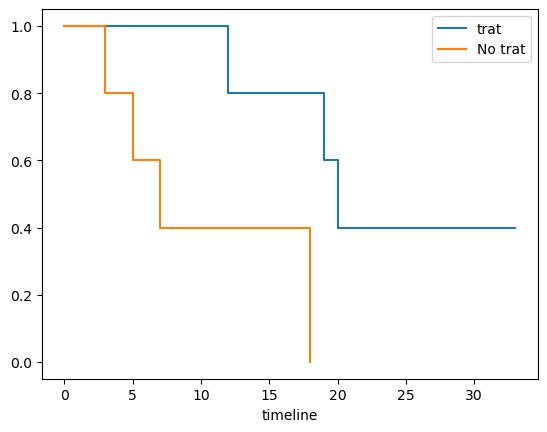

In [15]:
km_t.plot_survival_function(label='trat',ci_show=False)
km_nt.plot_survival_function(label = 'No trat',ci_show=False);

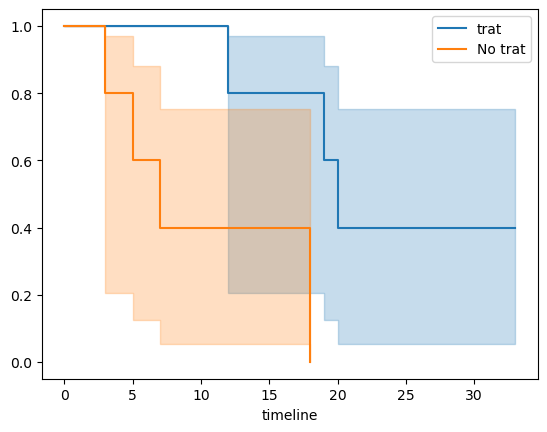

In [16]:
km_t.plot_survival_function(label='trat')
km_nt.plot_survival_function(label = 'No trat');

H0: $S_1(t)=S_2(t)$

Ha: $S_1(t) =/= S_2(t)$

In [17]:
from lifelines.statistics import logrank_test

In [18]:
lrt_1 = logrank_test(tratamiento['tiempo'], tratamiento['evento'],
                    no_trat['tiempo'],no_trat['evento'])

Si p-value < $\alpha$ rechazamos H0

In [19]:
lrt_1.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.50 0.01      7.34

Con un $\alpha = 0.05$ Rechazamos H0, significa que las funciones de supervivencia son distintas 

In [20]:
km_nt.median_survival_time_

7.0

El 50% de los no tratados muere antes del mes 7 

In [21]:
km_t.median_survival_time_

20.0

El 50% de los tratados muere despues del mes 20